In [11]:
folder = "irb/112"
SESSION_ID = "CHI2019"
DATA_ROOT = "irb"

# IMPORTS

In [12]:
import json, datetime, time, os
from glob import glob
import numpy as np
from matplotlib import pyplot as pl
import pylab as pl
import warnings
warnings.filterwarnings(action='ignore')

In [13]:
def get_file(folder, prefix):
    user = os.path.basename(folder)
    files = glob(folder + "/"+prefix+"*.json")
    if len(files) == 0:
        print("File not found", prefix, 'in', folder)
        return None
    else: 
        with open(files[0], 'r+') as f: 
            contents = json.load(f)
            return contents, files[0]
    

# Visualizations

In [14]:
contents, f = get_file(folder, "eda")

In [15]:
def adjust_data(data, t, Fs):
    metadata,f = get_file(folder, "sessionmetadata")

    # ADJUST Y AND T RANGE    
    start = metadata["session_start"] - t
    end = metadata["session_end"] - t    
    t0 = start * Fs 
    t0 = start * Fs  if start > 0 else 0
    tf = end * Fs - 1 if end < len(data) else len(data)
    data = data[int(t0):int(tf)]
    return data

In [16]:
def viz_tsf(sensor, ax = pl):
    contents, filename = get_file(folder, sensor)
    Fs = contents["sampling_rate"]
    y = contents["data"]
    y = np.array(y)
    metadata,f = get_file(folder, "sessionmetadata")
    t = contents["timestamp"]
    y = adjust_data(y, t, Fs)
    tm = np.floor(pl.arange(1., len(y)+1.) / Fs)
    ax.plot(tm, y)

In [17]:
def viz_ts(sensor, ax = pl):
    contents, filename = get_file(folder, sensor)
    data = contents["data"]
    y = np.array(data["y"])
    metadata,f = get_file(folder, "sessionmetadata")
    start = metadata["session_start"]
    t = np.array(data["t"]) - start
    ax.plot(t, y)

In [18]:
def viz_marker(sensor, ax=pl):
    metadata, f = get_file(folder, "eda")
    Fs = metadata['sampling_rate']
    metadata, f = get_file(folder, "sessionmetadata")
    start = metadata["session_start"]
    end = metadata["session_end"]
    
    contents, filename = get_file(folder, sensor)
    data = contents['data']
    
#     print("range", start, end)
    if sensor == "log":
        timestamps = [d['time'] for d in data]
    else:
        timestamps = data
    for tag in timestamps:
        elapsed_time = tag - start
#         x = elapsed_time * Fs
        x = elapsed_time
        ax.axvline(x=x, color='y')

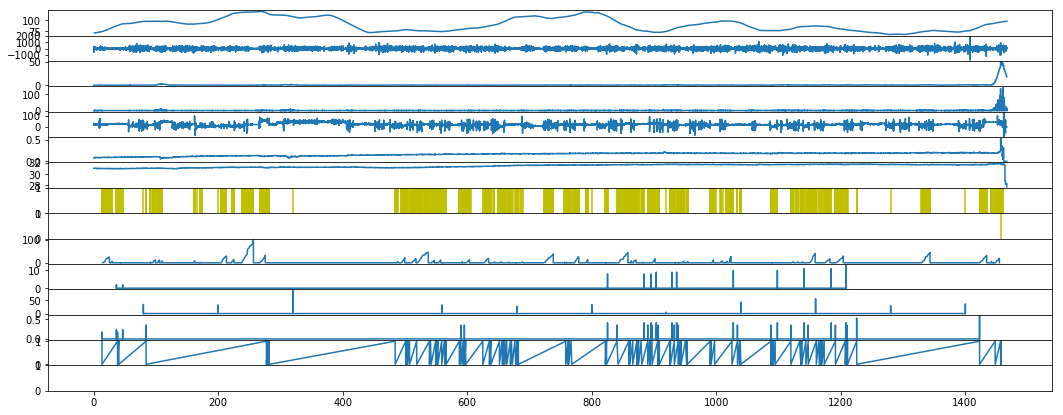

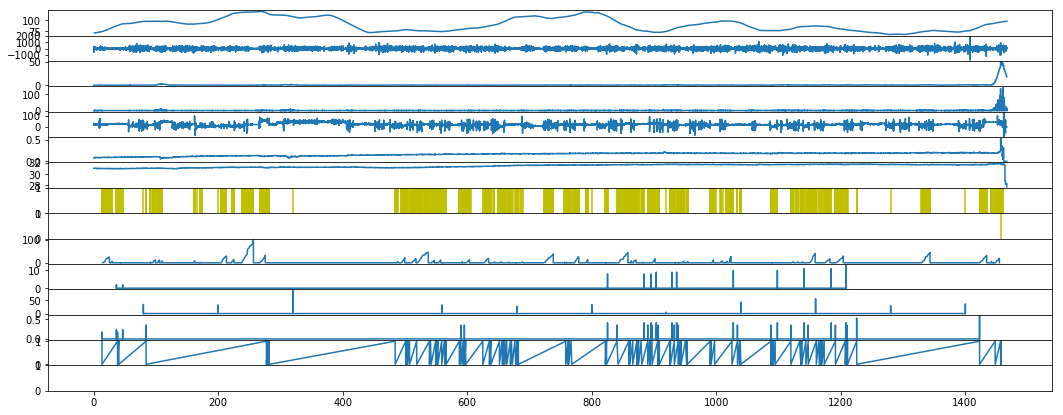

20.0


In [20]:
pl.rcParams['figure.figsize'] = [18, 7]
fig, axs = pl.subplots(15, 1, sharex=True)
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

viz_tsf("hr", axs[0])
viz_tsf("bvp", axs[1])
viz_tsf("phasic", axs[2])
viz_tsf("smna", axs[3])
viz_tsf("acc-x", axs[4])
viz_tsf("eda", axs[5])
viz_tsf("temp", axs[6])
viz_marker("log", axs[7])
viz_marker("tags", axs[8])
viz_ts("textchunk", axs[9])
viz_ts("execute", axs[10])
viz_ts("notebooksaved", axs[11])
viz_ts("select", axs[12])
viz_ts("mouseevent", axs[13])
# viz_ts("q1", axs[14])

pl.show()
print(1200/60)